# XGBoost Classification White Wine

In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("./Resources/Data/winequality-white-clean-xgboost.csv", delimiter=',')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3952,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
3953,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
3954,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
3955,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
X = df.drop(['quality'], axis = 1)
y = df['quality']
print(X.shape, y.shape)


(3957, 11) (3957,)


# Create a Train Test Split

In [4]:
# Split the data using train_test_split
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.332,random_state=3)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((2769, 11), (793, 11), (395, 11), (2769,), (793,), (395,))

In [5]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [6]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [7]:
# Init classifier
xgb_cl = xgb.XGBClassifier(use_label_encoder=False, objective="binary:logistic")
print(xgb_cl)
xgb_cl.fit(X_train, y_train)
print(f'Train Data Score: {xgb_cl.score(X_train,y_train)}')
print(f'Validation Data Score: {xgb_cl.score(X_val,y_val)}')

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None)
[00:29:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd li

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [8]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.5,0.7,0.9],
    "colsample_bytree": [0.5, 0.7, 0.9],
}

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False)

# Init Grid Search
grid = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, verbose=3, cv=3, scoring="roc_auc",return_train_score=True)


In [9]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[00:30:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, us

In [10]:
print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
0.8344659962039832


In [11]:
#Choose the best parameter and run a final test from one of those:
#1 - Previous tuning or
#2 - GridSearch
#best_xgb_cl = xgb_cl 
#or
best_xgb_cl = grid.best_estimator_ #Chose this because GridSearch got a 0.834 score
print(best_xgb_cl)
best_xgb_cl.fit(X_train, y_train)
X_train_c = np.concatenate([X_train, X_val])
y_train_c = np.concatenate([y_train, y_val])
best_xgb_cl.fit(X_train_c, y_train_c)
print(f'Train and Validation Data Concat: {best_xgb_cl.score(X_train_c,y_train_c)}')
print(f'Validation Data: {best_xgb_cl.score(X_val,y_val)}')
print(f'Final result Test Data: {best_xgb_cl.score(X_test,y_test)}')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
[00:30:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:50] WARNING: /o

In [12]:
predictions = best_xgb_cl.predict(X_test)
actual = y_test.tolist()

pred_act=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [13]:
# Calculate classification report
y_names = ['Fair','Very Good']

print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.84      0.94      0.89       316
   Very Good       0.55      0.29      0.38        79

    accuracy                           0.81       395
   macro avg       0.69      0.62      0.63       395
weighted avg       0.78      0.81      0.79       395



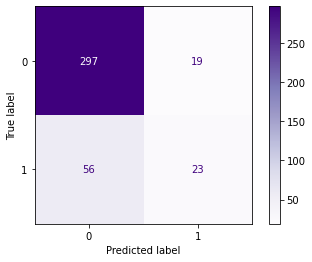

In [14]:
plot_confusion_matrix(best_xgb_cl, X_test, y_test, cmap=plt.cm.Purples)  
plt.savefig('Resources/images/XGBoost_White_Confusion_Matrix.png')
plt.show()

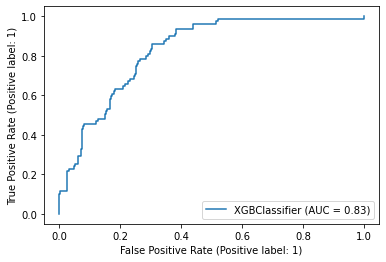

In [15]:
rf_disp = plot_roc_curve(best_xgb_cl, X_test, y_test)
plt.savefig('Resources/images/XGBoost_White_AUC_Graph.png')
plt.show()

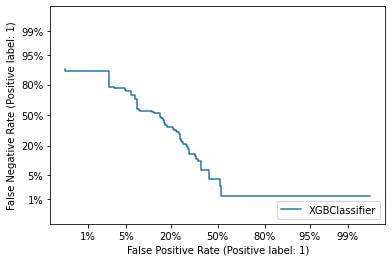

In [16]:
rf_disp = metrics.plot_det_curve(best_xgb_cl, X_test, y_test)  
plt.savefig('Resources/images/XGBoost_White_Graph.png')
plt.show() 

In [17]:
best_xgb_cl.feature_importances_

array([0.06452627, 0.07852594, 0.07095382, 0.0755274 , 0.08113344,
       0.08287389, 0.06609127, 0.08494114, 0.08073892, 0.06241629,
       0.2522717 ], dtype=float32)

In [18]:
feature_names = X.columns
print(feature_names)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [19]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_xgb_cl, X_test, y_test)

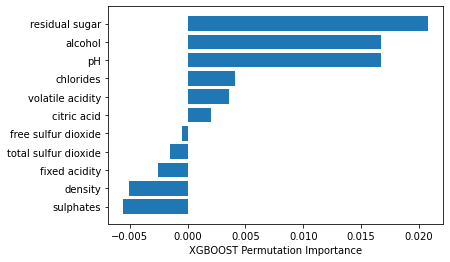

In [20]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("XGBOOST Permutation Importance")
plt.savefig('Resources/images/XGBoost_White_Feature_Importance.png')

In [21]:
# Drop less import features
X = df.drop(['fixed acidity','density','sulphates', 'quality'], axis = 1)
y = df['quality']
print(X.shape, y.shape)

(3957, 8) (3957,)


In [22]:
# Split the data using train_test_split

X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.332,random_state=3)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((2769, 8), (793, 8), (395, 8), (2769,), (793,), (395,))

In [23]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [24]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [25]:
best_xgb_cl = grid.best_estimator_
print(best_xgb_cl)
best_xgb_cl.fit(X_train, y_train)
X_train_c = np.concatenate([X_train, X_val])
y_train_c = np.concatenate([y_train, y_val])
best_xgb_cl.fit(X_train_c, y_train_c)
print(f'Train and Validation Data Concat: {best_xgb_cl.score(X_train_c,y_train_c)}')
print(f'Validation Data: {best_xgb_cl.score(X_val,y_val)}')
print(f'Final result Test Data: {best_xgb_cl.score(X_test,y_test)}')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
[00:30:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:59] WARNING: /o

In [26]:
predictions = best_xgb_cl.predict(X_test)
actual = y_test.tolist()

pred_act=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)


In [27]:
# Calculate classification report
y_names = ['Fair','Very Good']

print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.85      0.94      0.89       316
   Very Good       0.58      0.32      0.41        79

    accuracy                           0.82       395
   macro avg       0.71      0.63      0.65       395
weighted avg       0.79      0.82      0.80       395



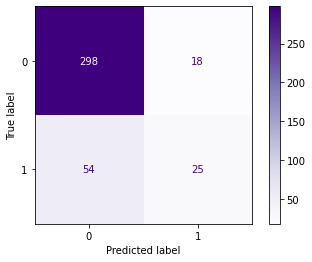

In [28]:
plot_confusion_matrix(best_xgb_cl, X_test, y_test, cmap=plt.cm.Purples)

plt.savefig('Resources/images/XGBoost_White_Less_Features_Confusion_Matrix.png')
plt.show() 

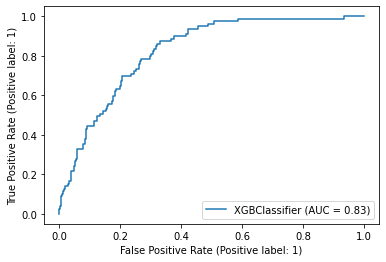

In [29]:
rf_disp = plot_roc_curve(best_xgb_cl, X_test, y_test)

plt.savefig('Resources/images/XGBoost_White_Less_Features_AUC_Graph.png')
plt.show()

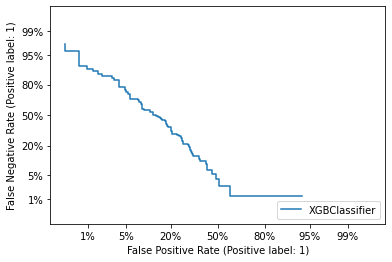

[00:29:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, subsample=0.7;, score=(train=0.860, test=0.808) total time=   0.8s
[00:29:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, subsample=0.7;, score=(train=0.886, test=0.813) total time=   1.0s
[00:29:5

[00:29:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, subsample=0.5;, score=(train=0.849, test=0.829) total time=   0.8s
[00:29:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, subsample=0.5;, score=(train=0.884, test=0.812) total time=   1.0s
[00:29:5

[00:29:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, subsample=0.5;, score=(train=0.851, test=0.818) total time=   0.8s
[00:29:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, subsample=0.5;, score=(train=0.874, test=0.822) total time=   1.2s
[00:29:5

In [30]:
rf_disp = metrics.plot_det_curve(best_xgb_cl, X_test, y_test)  
  
plt.savefig('Resources/images/XGBoost_White_Less_Features_Graph.png')
plt.show() 